# Анализ компаний "единорогов"   
   
Источник: https://www.kaggle.com/datasets/deepcontractor/unicorn-companies-dataset   

### Задачи:   
1. Провести анализ привлечённых инвестиций в разрезе отраслей.   
1. Провести аанализ привлечённых инвестици в разрезе стран.  
   
Посмотрим:
* топ-5 отраслей и стран с самой большой оценкой компаний.
* отрасль и страну которая быстрее всего растет в общей стоимости компаний с начала 2000-х годов.

---

### 1. Загрузка данных

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from io import BytesIO
import requests

In [2]:
# Загрузим данные с Гугл диска
spreadsheet_id = '13y2UTol4RQ-qw2KhZ-xkSGeDWuV23vXbaPIrwpPrNpw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
unicorn = pd.read_csv(BytesIO(r.content))

In [3]:
# Посмотрим данные
unicorn.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [4]:
# Посмотрим писание датасета
unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


---

### 2. Предобработка данных

1. В отраслях есть вариация в названиии одних и тех же отраслей - заменим.   
1. В отралях есть записи с названиями инвестфондов - игнорируем.   
1. Отображение инвестиций в $ не очень удобно для восприятия - изменим тип данных.

In [5]:
# Замена наваний отраслей
unicorn['Industry'] = unicorn['Industry'].str.replace("Finttech", "Fintech")
unicorn['Industry'] = unicorn['Industry'].str.replace("Artificial Intelligence", "Artificial intelligence")
unicorn['Industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank',
       'E-commerce & direct-to-consumer', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Partners, DST Global',
       'SingTel Innov8, Alpha JWC Ventures, Golden Gate Ventures'

In [6]:
# Нам нужны не все колонки из исходного датафрейма, выберм необходимы
unicorn = unicorn[['Valuation ($B)','Country','Founded Year', 'Industry']]
unicorn.head()

,Valuation ($B),Country,Founded Year,Industry
0,$140,China,2012,Artificial intelligence
1,$100.3,United States,2002,Other
2,$95,United States,2010,Fintech
3,$45.6,Sweden,2005,Fintech
4,$42,United States,1991,Other


In [7]:
# не очень удобно работать с $, заменим на тип float
unicorn['Valuation ($B)'] = unicorn['Valuation ($B)'].str.replace('$','').astype('float')
int = 4
float = 4.2
unicorn['Valuation in $'] = unicorn['Valuation ($B)'].apply(lambda x: x*1000000000+10*23)
unicorn.head()

C:\Users\Sergey\AppData\Local\Temp/ipykernel_8736/1791949873.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  unicorn['Valuation ($B)'] = unicorn['Valuation ($B)'].str.replace('$','').astype('float')


,Valuation ($B),Country,Founded Year,Industry,Valuation in $
0,140.0,China,2012,Artificial intelligence,1.400000e+11
1,100.3,United States,2002,Other,1.003000e+11
2,95.0,United States,2010,Fintech,9.500000e+10
3,45.6,Sweden,2005,Fintech,4.560000e+10
4,42.0,United States,1991,Other,4.200000e+10


### 3. Отраслевой анализ
Посмотрим:   
* топ-5 отраслей с самой большой оценкой компаний.   
* отрасль которая быстрее всего растет в общей стоимости компаний с начала 2000-х годов.

In [8]:
# возьмем топ 5 отраслей по совокупной оценке
unicorn_industry = unicorn.groupby('Industry').sum('Valuation ($B)').sort_values(by = 'Valuation ($B)',ascending=False).head(6).reset_index()
# в топ-5 попали 'прочие отрасли' - Other, поэтому посмотрим на 6-ю позицию
unicorn_industry.head(6)

,Industry,Valuation ($B),Valuation in $
0,Fintech,794.82,7.948200e+11
1,Internet software & services,556.13,5.561300e+11
2,E-commerce & direct-to-consumer,325.39,3.253900e+11
3,Artificial intelligence,317.89,3.178900e+11
4,Other,265.20,2.652000e+11
5,Health,182.52,1.825200e+11


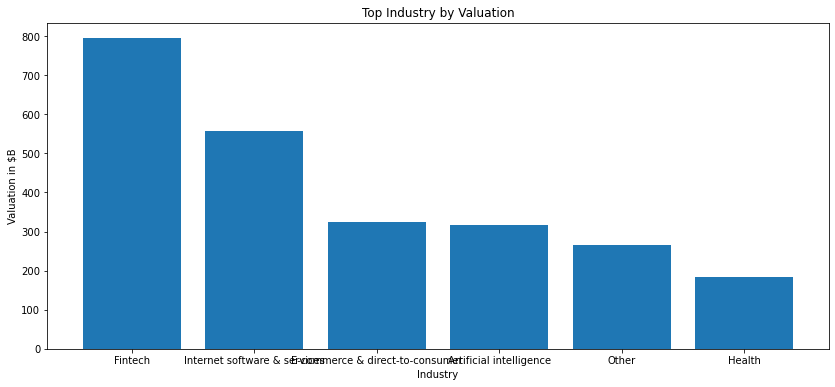

In [9]:
# нарисуем бар чарт
plt.figure(figsize=(14,6))
plt.bar(unicorn_industry['Industry'], unicorn_industry['Valuation ($B)'],alpha = 1)
plt.title('Top Industry by Valuation')
plt.ylabel('Valuation in $B')
plt.xlabel('Industry')
plt.show()

In [10]:
# отфильтруем датафрейм на наш топ-5 отраслей
industry_filtered = unicorn[unicorn['Industry'].isin(['Fintech','Internet software & services','E-commerce & direct-to-consumer','Artificial intelligence','Health'])]
industry_filtered.head()

,Valuation ($B),Country,Founded Year,Industry,Valuation in $
0,140.0,China,2012,Artificial intelligence,1.400000e+11
2,95.0,United States,2010,Fintech,9.500000e+10
3,45.6,Sweden,2005,Fintech,4.560000e+10
5,40.0,Australia,2012,Internet software & services,4.000000e+10
6,40.0,United Kingdom,2012,Fintech,4.000000e+10


In [11]:
# Сгруппируем индустрия и год основания компании, уберём пропуски
industry_filtered = industry_filtered.groupby(['Industry','Founded Year']).sum('Valuation$').reset_index()
industry_filtered = industry_filtered[industry_filtered['Founded Year']!='None']
industry_filtered = industry_filtered.set_index('Founded Year')
industry_filtered.head()

,Industry,Valuation ($B),Valuation in $
Founded Year,,,
1973,Artificial intelligence,2.0,2.000000e+09
2003,Artificial intelligence,6.8,6.800000e+09
2005,Artificial intelligence,2.1,2.100000e+09
2006,Artificial intelligence,1.6,1.600000e+09
2007,Artificial intelligence,1.0,1.000000e+09


In [12]:
# Подсчитаем сумму инвестиций по отраслям накопленым итогом
industry_filtered['Cumulative Valuation ($B)'] = industry_filtered['Valuation ($B)'].cumsum()
industry_filtered['Cumulative Valuation ($B) % growth'] = industry_filtered['Cumulative Valuation ($B)']/industry_filtered['Cumulative Valuation ($B)'].shift(1) - 1
industry_filtered.head()

,Industry,Valuation ($B),Valuation in $,Cumulative Valuation ($B),Cumulative Valuation ($B) % growth
Founded Year,,,,,
1973,Artificial intelligence,2.0,2.000000e+09,2.0,NaN
2003,Artificial intelligence,6.8,6.800000e+09,8.8,3.400000
2005,Artificial intelligence,2.1,2.100000e+09,10.9,0.238636
2006,Artificial intelligence,1.6,1.600000e+09,12.5,0.146789
2007,Artificial intelligence,1.0,1.000000e+09,13.5,0.080000


In [13]:
industry_filtered.index = pd.to_datetime(industry_filtered.index, format='%Y')

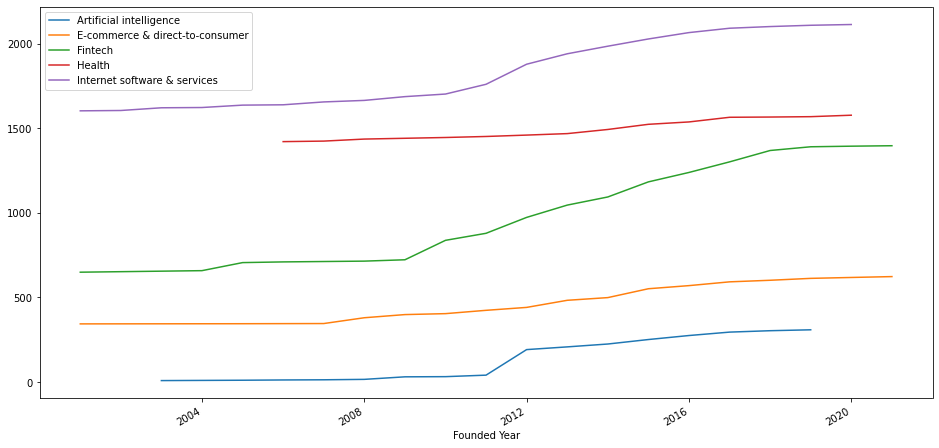

In [14]:
# уберем все что до 2000-го года и визуализируем
industry_filtered = industry_filtered[industry_filtered.index>'2000']
industry_filtered.groupby('Industry')['Cumulative Valuation ($B)'].plot(legend = True, figsize = (16,8))
plt.show()

**Выводы:**   
1. Лидер по объему привлеченных инвестиций -  финтех.
1. Но, в 2000-2010-е годы болше инвестировали в интернет-технологии и сервисы и тему связанную со здоровьем.
1. После 2012 года начался резкий рост инвестиций искусственный интеллект.

### 4. Страновой анализ
Посмотрим:   
* топ-5 стран с самой большой оценкой компаний.   
* страну которая быстрее всего растет в общей стоимости компаний с начала 2000-х годов.

In [15]:
# возьмем топ 5 стран по совокупной оценке
unicorn_country = unicorn.groupby('Country').sum('Valuation ($B)').sort_values(by = 'Valuation ($B)',ascending=False).head(5).reset_index()
unicorn_country.head()

,Country,Valuation ($B),Valuation in $
0,United States,1829.74,1.829740e+12
1,China,572.69,5.726900e+11
2,India,187.05,1.870500e+11
3,United Kingdom,177.68,1.776800e+11
4,Germany,66.70,6.670001e+10


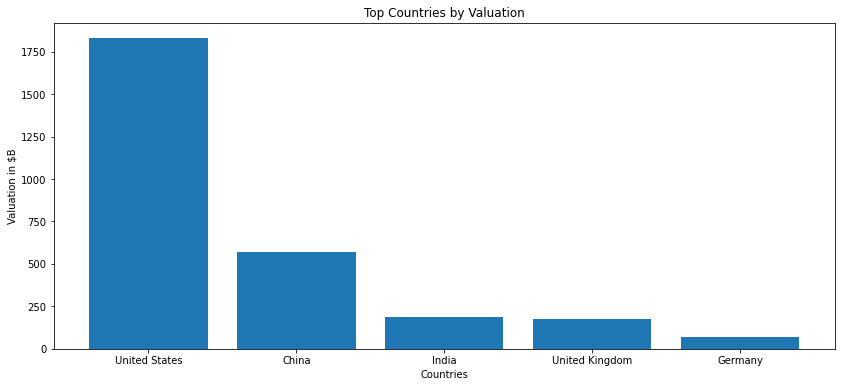

In [16]:
# нарисуем бар чарт
plt.figure(figsize=(14,6))
plt.bar(unicorn_country['Country'], unicorn_country['Valuation ($B)'],alpha = 1)
plt.title('Top Countries by Valuation')
plt.ylabel('Valuation in $B')
plt.xlabel('Countries')
plt.show()

In [17]:
# отфильтруем датафрейм на наш топ-5 стран
country_filtered = unicorn[unicorn['Country'].isin(['United States','China', 'India','United Kingdom','Germany'])]
country_filtered.head()

,Valuation ($B),Country,Founded Year,Industry,Valuation in $
0,140.0,China,2012,Artificial intelligence,1.400000e+11
1,100.3,United States,2002,Other,1.003000e+11
2,95.0,United States,2010,Fintech,9.500000e+10
4,42.0,United States,1991,Other,4.200000e+10
6,40.0,United Kingdom,2012,Fintech,4.000000e+10


In [18]:
# Сгруппируем индустрия и год основания компании, уберём пропуски
country_filtered = country_filtered.groupby(['Country','Founded Year']).sum('Valuation$').reset_index()
country_filtered = country_filtered[country_filtered['Founded Year']!='None']
country_filtered = country_filtered.set_index('Founded Year')
# Подсчитаем сумму инвестиций по отраслям накопленым итогом
country_filtered['Cumulative Valuation ($B)'] = country_filtered['Valuation ($B)'].cumsum()
country_filtered['Cumulative Valuation ($B) % growth'] = country_filtered['Cumulative Valuation ($B)']/country_filtered['Cumulative Valuation ($B)'].shift(1) - 1
country_filtered.head()

,Country,Valuation ($B),Valuation in $,Cumulative Valuation ($B),Cumulative Valuation ($B) % growth
Founded Year,,,,,
1997,China,1.00,1.000000e+09,1.00,NaN
1998,China,1.00,1.000000e+09,2.00,1.000000
1999,China,6.83,6.830000e+09,8.83,3.415000
2000,China,1.00,1.000000e+09,9.83,0.113250
2001,China,6.77,6.770000e+09,16.60,0.688708


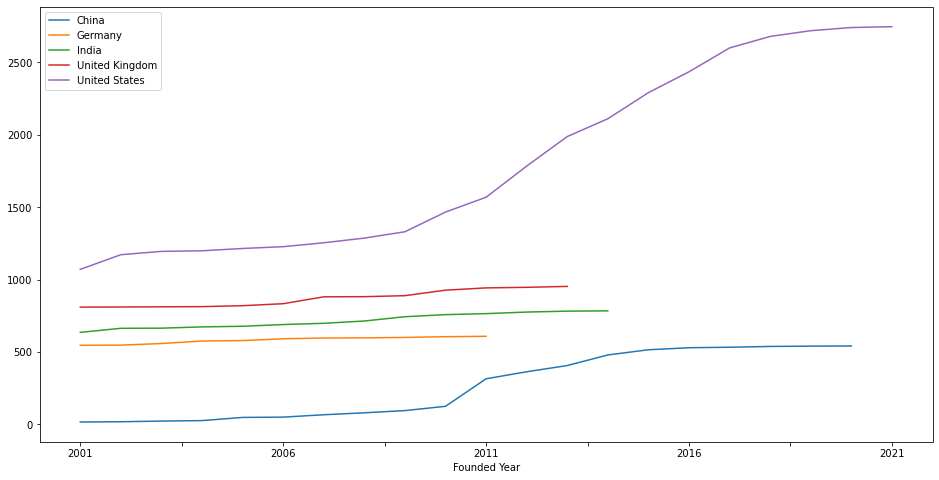

In [19]:
# уберем все что до 2000-го года и визуализируем
country_filtered = country_filtered[country_filtered.index>'2000']
country_filtered.groupby('Country')['Cumulative Valuation ($B)'].plot(legend = True, figsize = (16,8))
plt.show()

**Выводы:**   
1. Лидер по объему привлеченных инвестиций -  США.
1. В компании зарегестрированные в США сильнее всех нарастили объём привлеченных инвестиций.
1. После 2011 года начался резкий рост инвестиций в китайские компании.